# House Price Prediction Project

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [2]:
raw_train_dataset = pd.read_csv('train.csv')
raw_test_dataset = pd.read_csv('test.csv')

raw_train_dataset.shape, raw_test_dataset.shape

((1460, 81), (1459, 80))

In [3]:
raw_train_dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
raw_test_dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


### Data Integration

In [5]:
integrated_dataset = pd.concat([raw_train_dataset, raw_test_dataset])

org_integrated_dataset = integrated_dataset.copy()
integrated_dataset.shape

(2919, 81)

Setting 'Id' variable as index

In [6]:
integrated_dataset.set_index('Id', inplace=True)
org_integrated_dataset.set_index('Id', inplace=True)

In [7]:
integrated_dataset.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


### Brief information of data

In [8]:
integrated_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [9]:
int_variables = integrated_dataset.select_dtypes(include=['int64']).columns
int_variables.tolist()

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [10]:
float_variables = integrated_dataset.select_dtypes(include=['float64']).columns
float_variables.tolist()

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [11]:
cat_variables = integrated_dataset.select_dtypes(include=['O']).columns
cat_variables.tolist()

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

### Statistical Information of data

In [12]:
integrated_dataset.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### Handling missing values

Visualise Null/Missing values

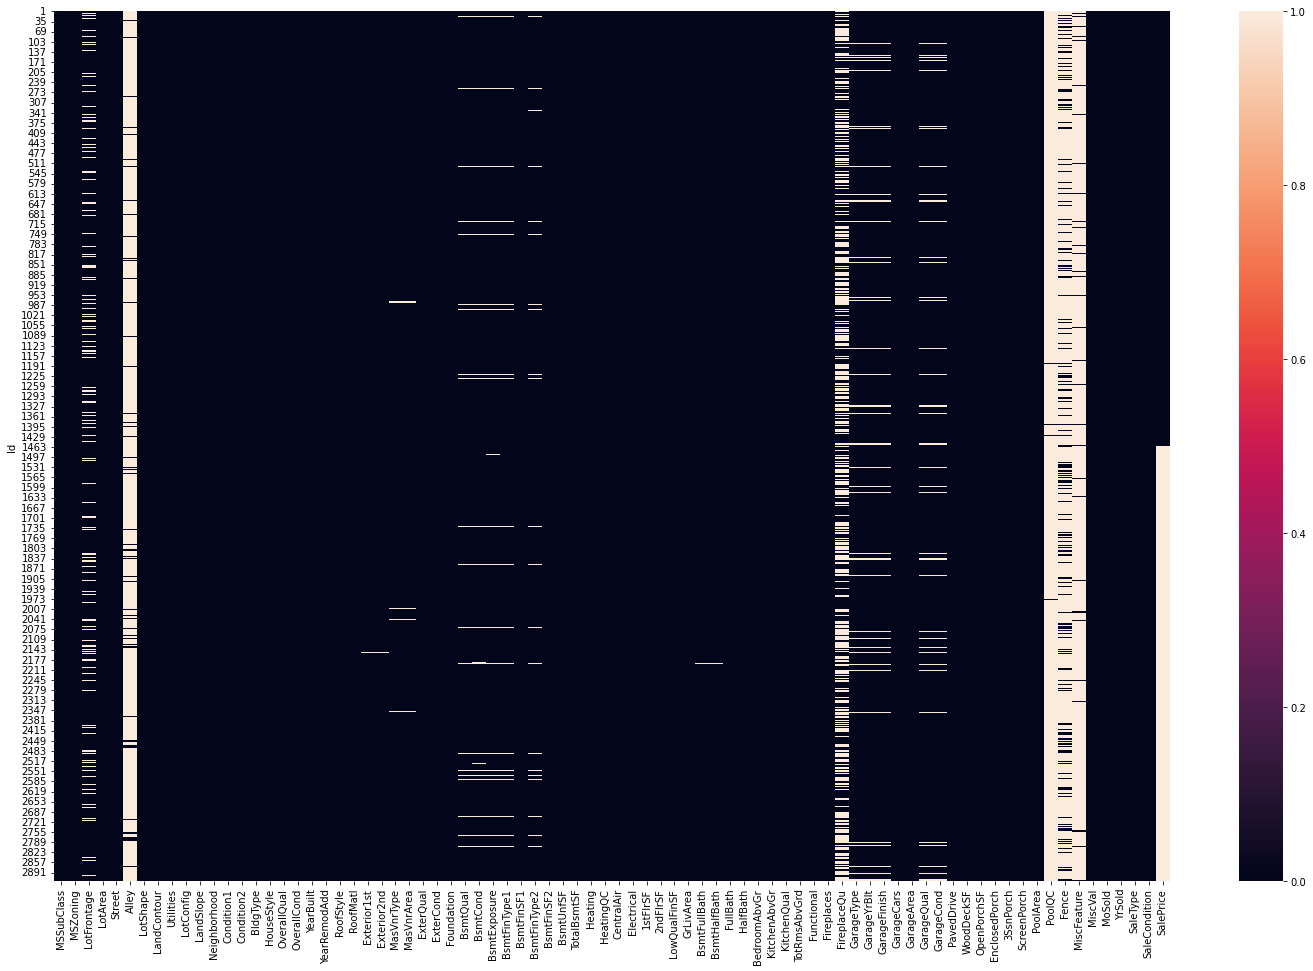

In [13]:
plt.figure(figsize=(25, 16))
sns.heatmap(integrated_dataset.isnull())
plt.savefig('heatmap_missing.png')
plt.show()

Get the null percentage of each features

In [14]:
null_percent = integrated_dataset.isnull().sum() / integrated_dataset.shape[0] * 100
null_percent

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 80, dtype: float64

Checking for variables having null values more than 50%

In [15]:
null_percent[null_percent > 50]

Alley          93.216855
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

Checking for variables having null values between 20% and 50%

In [16]:
null_percent[(null_percent > 20) & (null_percent < 50)]

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

Checking for variables having null values less than 20%

In [17]:
null_percent[null_percent < 20]

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
Length: 74, dtype: float64

##### According to data_description, values that seem to be missing and represented as 'NA' in the dataset are actually not missing values, so we will not drop these variables and fill those with a constant value

### Imputing missing values

In [18]:
missing_value_variables = null_percent[null_percent > 0]
print(len(missing_value_variables))
missing_value_variables

35


MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

##### Handling Integer variables

In [19]:
int_missing_variables = missing_value_variables[missing_value_variables.keys().isin(int_variables)]
int_missing_variables

Series([], dtype: float64)

No Missing values in Integer variables

##### Handling Float variables

In [20]:
float_missing_variables = missing_value_variables[missing_value_variables.keys().isin(float_variables)]
float_missing_variables

LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

##### Data Distribution function

In [21]:
def data_distribution(data):
    plt.figure(figsize=(16, 9))
    plt.subplot(121)
    sns.boxplot(data)
    plt.subplot(122)
    sns.distplot(data)
    plt.show()

In [22]:
def oldvsnew_distribution(old, new, var):
    plt.figure(figsize=(25, 16))
    plt.subplot(221)
    sns.boxplot(old[var])
    plt.title('Old Distribution')
    plt.subplot(222)
    sns.distplot(old[var])
    plt.title('Old Distribution')
    plt.subplot(223)
    sns.boxplot(new[var])
    plt.title('New Distribution')
    plt.subplot(224)
    sns.distplot(new[var])
    plt.title('New Distribution')
    plt.show()

Handling with LotFrontage

C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


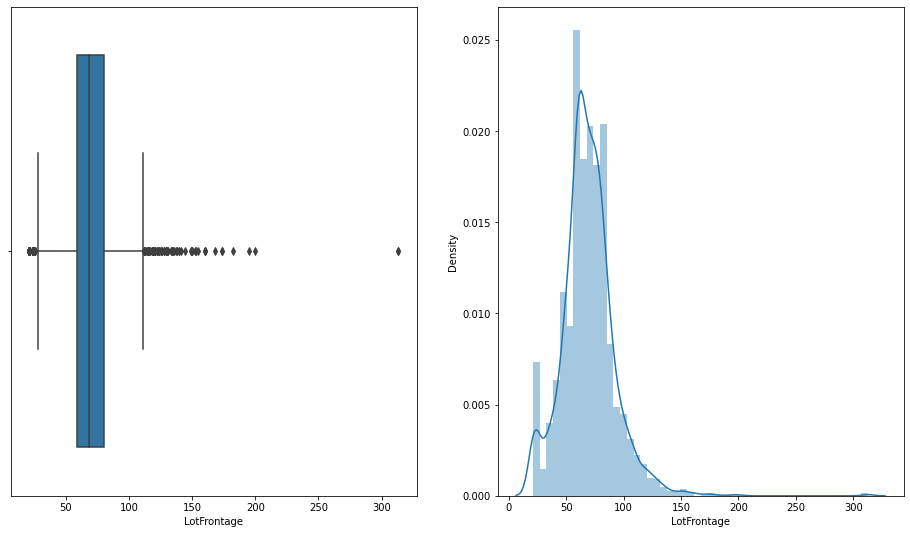

In [23]:
data_distribution(integrated_dataset['LotFrontage'])

In [24]:
lotfrontage_median = integrated_dataset['LotFrontage'].median()
integrated_dataset.LotFrontage.replace(np.nan, lotfrontage_median, inplace=True)
integrated_dataset.LotFrontage.isnull().sum()

0

C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other argu

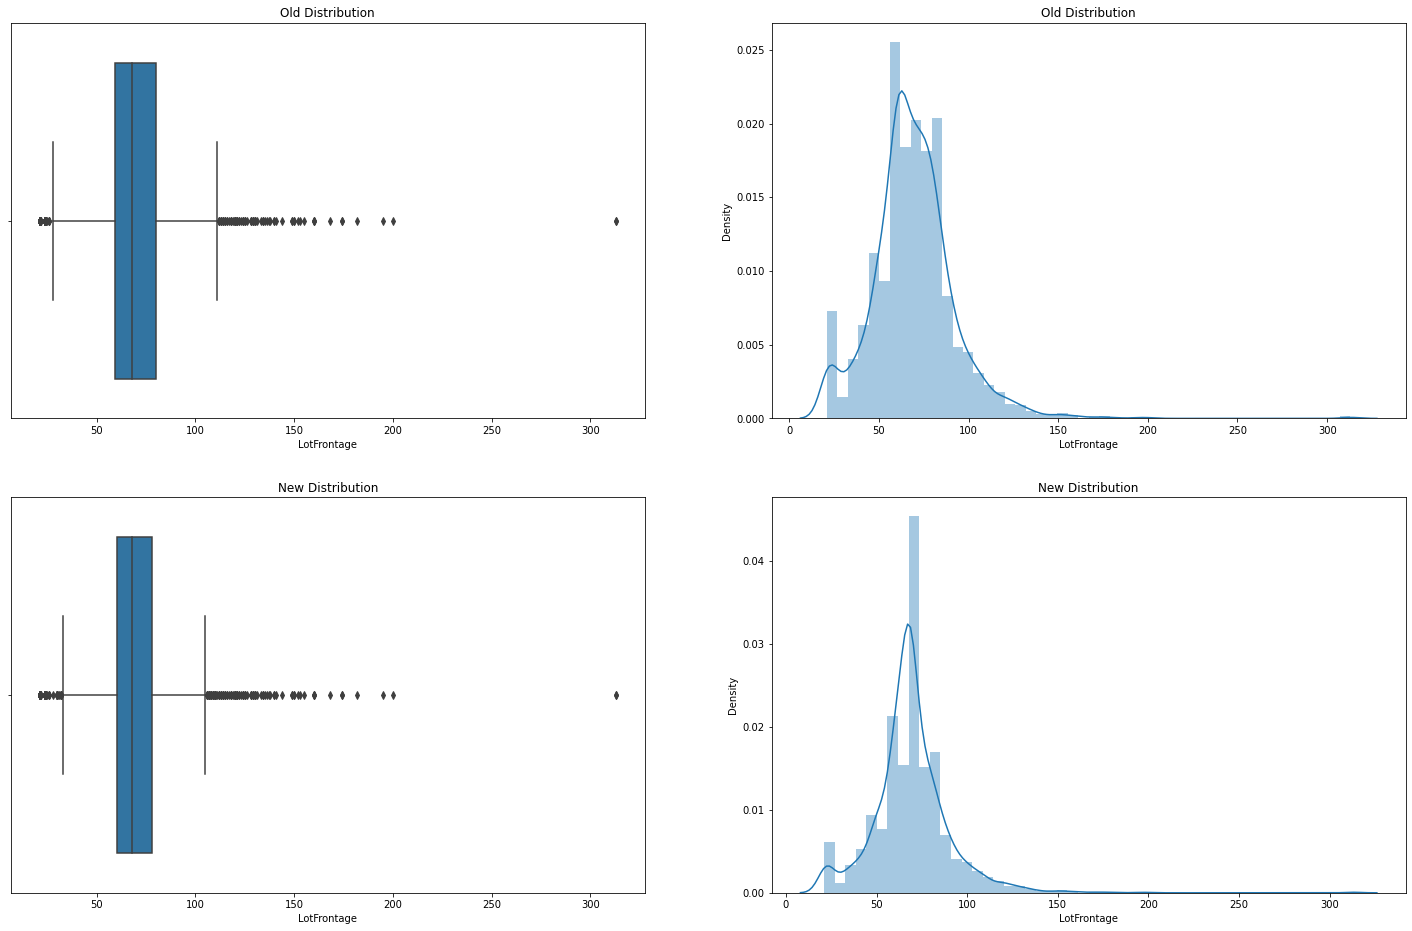

In [25]:
oldvsnew_distribution(org_integrated_dataset, integrated_dataset, 'LotFrontage')

Handling with MasVnrArea

C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


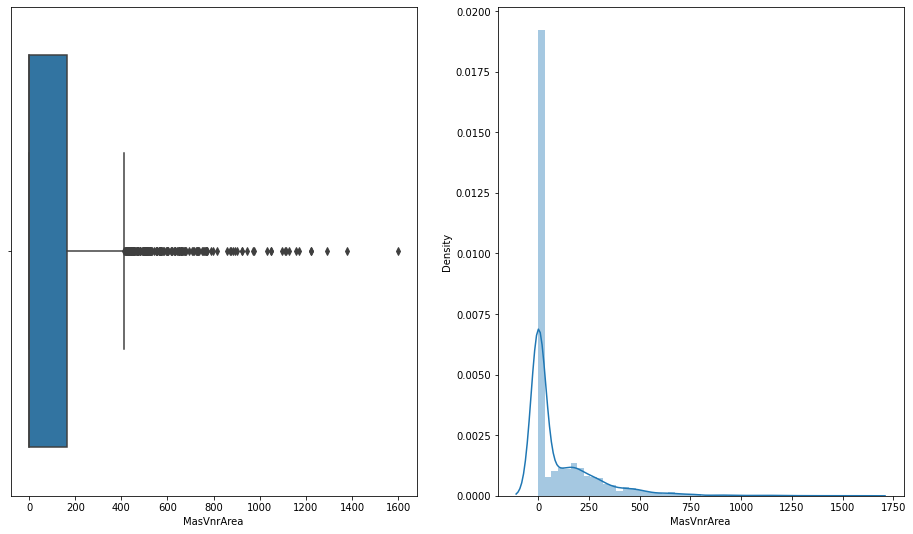

In [26]:
data_distribution(integrated_dataset['MasVnrArea'])

In [27]:
masvnrarea_const = 0
integrated_dataset.MasVnrArea.replace(np.nan, masvnrarea_const, inplace=True)
integrated_dataset.MasVnrArea.isnull().sum()

0

Handling BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath, GarageYrBlt, GarageCars, GarageArea

In [28]:
num_var_const = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
                 'GarageCars', 'GarageArea']
for var in num_var_const:
    integrated_dataset[var].replace(np.nan, 0, inplace=True)

##### Handling categorical variables

In [29]:
cat_missing_variables = missing_value_variables[missing_value_variables.keys().isin(cat_variables)]
cat_missing_variables

MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

Handling with 'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Electrical', 'KitchenQual', 'Functional', 'SaleType'

In [30]:
cat_var_mode = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Electrical', 'KitchenQual',
                'Functional', 'SaleType']
for var in cat_var_mode:
    integrated_dataset[var].replace(np.nan, integrated_dataset[var].mode()[0], inplace=True)

Handling with 'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'

In [31]:
cat_var_const = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType',
                 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
for var in cat_var_const:
    integrated_dataset[var].replace(np.nan, 'NA', inplace=True)

#### Cleaned dataset

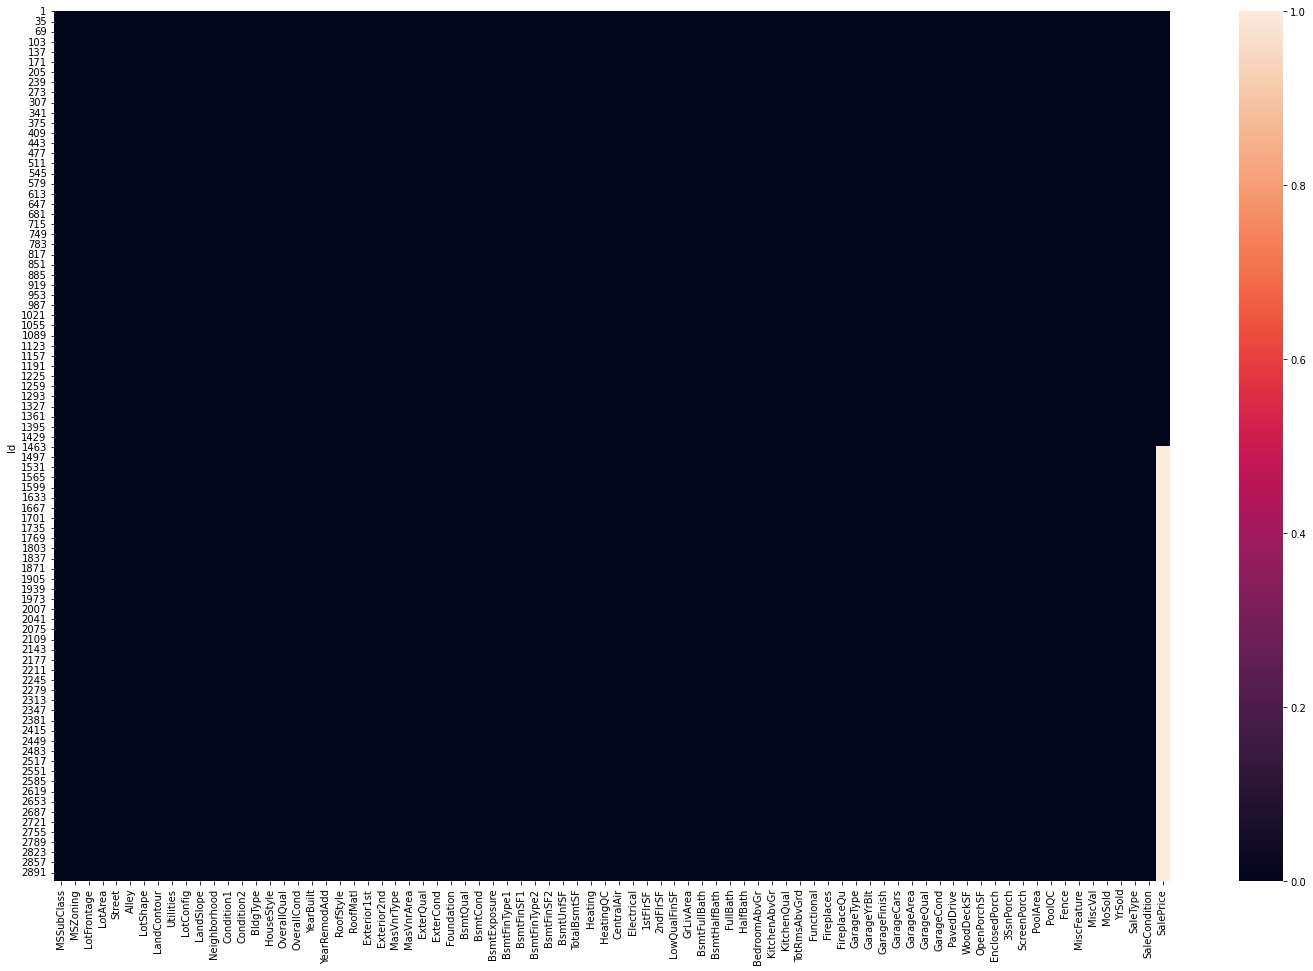

In [32]:
plt.figure(figsize=(25, 16))
sns.heatmap(integrated_dataset.isnull())
plt.savefig('heatmap_cleaned.png')
plt.show()

### Feature Transformation

#### Converting numerical feature to categorical feature

In [33]:
num_to_cat = ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
for var in num_to_cat:
    integrated_dataset[var] = integrated_dataset[var].astype(str)
for var in num_to_cat:
    print(var, integrated_dataset[var].dtypes)

MSSubClass object
YearBuilt object
YearRemodAdd object
GarageYrBlt object
YrSold object


In [34]:
import calendar

integrated_dataset['MoSold'] = integrated_dataset['MoSold'].apply(lambda x: calendar.month_abbr[x])
integrated_dataset.MoSold.unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

#### Converting categorical feature to numerical feature
##### Ordinal Encoding

In [35]:
from pandas.api.types import CategoricalDtype

In [36]:
integrated_dataset['BsmtCond'].unique()

array(['TA', 'Gd', 'NA', 'Fa', 'Po'], dtype=object)

In [37]:
integrated_dataset['BsmtCond'] = integrated_dataset['BsmtCond'].astype(
    CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes

In [38]:
integrated_dataset['BsmtCond'].unique()

array([3, 4, 0, 2, 1], dtype=int8)

In [39]:
integrated_dataset['BsmtExposure'] = integrated_dataset['BsmtExposure'].astype(
    CategoricalDtype(categories=['NA', 'Mn', 'Av', 'Gd'], ordered=True)).cat.codes
integrated_dataset['BsmtFinType1'] = integrated_dataset['BsmtFinType1'].astype(
    CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ordered=True)).cat.codes
integrated_dataset['BsmtFinType2'] = integrated_dataset['BsmtFinType2'].astype(
    CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ordered=True)).cat.codes
integrated_dataset['BsmtQual'] = integrated_dataset['BsmtQual'].astype(
    CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
integrated_dataset['ExterQual'] = integrated_dataset['ExterQual'].astype(
    CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
integrated_dataset['ExterCond'] = integrated_dataset['ExterCond'].astype(
    CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
integrated_dataset['Functional'] = integrated_dataset['Functional'].astype(
    CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], ordered=True)).cat.codes
integrated_dataset['GarageCond'] = integrated_dataset['GarageCond'].astype(
    CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
integrated_dataset['GarageQual'] = integrated_dataset['GarageQual'].astype(
    CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
integrated_dataset['GarageFinish'] = integrated_dataset['GarageFinish'].astype(
    CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered=True)).cat.codes
integrated_dataset['HeatingQC'] = integrated_dataset['HeatingQC'].astype(
    CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
integrated_dataset['KitchenQual'] = integrated_dataset['KitchenQual'].astype(
    CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
integrated_dataset['PavedDrive'] = integrated_dataset['PavedDrive'].astype(
    CategoricalDtype(categories=['N', 'P', 'Y'], ordered=True)).cat.codes
integrated_dataset['Utilities'] = integrated_dataset['Utilities'].astype(
    CategoricalDtype(categories=['ELO', 'NASeWa', 'NASeWr', 'AllPub'], ordered=True)).cat.codes
integrated_dataset['PoolQC'] = integrated_dataset['PoolQC'].astype(
    CategoricalDtype(categories=['NA', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
integrated_dataset['FireplaceQu'] = integrated_dataset['FireplaceQu'].astype(
    CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes

##### One-Hot Encoding

In [40]:
integrated_dataset_encode = integrated_dataset.copy()

object_variables = integrated_dataset_encode.select_dtypes(include='object').columns.tolist()
object_variables

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [41]:
print("Shape before encoding: ", integrated_dataset_encode.shape)

Shape before encoding:  (2919, 80)


In [42]:
integrated_dataset_encode = pd.get_dummies(integrated_dataset_encode, columns=object_variables,
                                           prefix_sep=object_variables, drop_first=True)

In [43]:
print("Shape after encoding: ", integrated_dataset_encode.shape)

Shape after encoding:  (2919, 513)


In [44]:
integrated_dataset_encode.head()

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleTypeSaleTypeConLI,SaleTypeSaleTypeConLw,SaleTypeSaleTypeNew,SaleTypeSaleTypeOth,SaleTypeSaleTypeWD,SaleConditionSaleConditionAdjLand,SaleConditionSaleConditionAlloca,SaleConditionSaleConditionFamily,SaleConditionSaleConditionNormal,SaleConditionSaleConditionPartial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,3,7,5,196.0,3,2,4,3,...,0,0,0,0,1,0,0,0,1,0
2,80.0,9600,3,6,8,0.0,2,2,4,3,...,0,0,0,0,1,0,0,0,1,0
3,68.0,11250,3,7,5,162.0,3,2,4,3,...,0,0,0,0,1,0,0,0,1,0
4,60.0,9550,3,7,5,0.0,2,2,3,4,...,0,0,0,0,1,0,0,0,0,0
5,84.0,14260,3,8,5,350.0,3,2,4,3,...,0,0,0,0,1,0,0,0,1,0


## Splitting data for training

In [45]:
integrated_dataset_encode.shape

(2919, 513)

In [46]:
X_train = integrated_dataset_encode[:raw_train_dataset.shape[0]].drop('SalePrice', axis=1)
y_train = integrated_dataset_encode['SalePrice'][:raw_train_dataset.shape[0]]
X_test = integrated_dataset_encode[raw_train_dataset.shape[0]:].drop('SalePrice', axis=1)

X_train.shape, y_train.shape, X_test.shape

((1460, 512), (1460,), (1459, 512))

### Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler

sc_object = StandardScaler()
sc_object.fit(X_train)
X_train = sc_object.transform(X_train)
X_test = sc_object.transform(X_test)

In [48]:
X_train

array([[-0.21271975, -0.20714171,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.46815755, -0.09188637,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.07654429,  0.07347998,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [-0.16732793, -0.14781027,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.07654429, -0.08016039,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.24119845, -0.05811155,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [49]:
X_test

array([[ 0.46815755,  0.11076257,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.51354937,  0.37584985,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.19580663,  0.33205282,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [ 4.09950312,  0.95042275,  0.02618016, ..., -0.11785113,
        -2.13834494, -0.30599503],
       [-0.34889521, -0.00759964,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.19580663, -0.08918038,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

## Model Training

Importing Model Libraries

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.neural_network import MLPRegressor

from sklearn.isotonic import IsotonicRegression

from xgboost import XGBRegressor

In [51]:
models = {
    'a': ['LinearRegression', LinearRegression()],
    'b': ['SGDRegressor', SGDRegressor()],
    'c': ['KNeighborsRegressor', KNeighborsRegressor()],
    'd': ['DecisionTreeRegressor', DecisionTreeRegressor()],
    'e': ['SVR', SVR()],
    'f': ['GaussianProcessRegressor', GaussianProcessRegressor()],
    'g': ['RandomForestRegressor', RandomForestRegressor()],
    'h': ['GradientBoostingRegressor', GradientBoostingRegressor()],
    'i': ['MLPRegressor', MLPRegressor()],
    'j': ['IsotonicRegression', IsotonicRegression()],
    'k': ['XGBRegressor', XGBRegressor()]
}

Defining function to find the best training model

In [52]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def trainmodel(model, X_train, y_train):
    kf = KFold(n_splits=7, shuffle=True, random_state=42)
    scores = [(cross_val_score(model, X_train, y_train, scoring=make_scorer(r2_score), cv=kf)).mean()]
    return scores

In [53]:
models_score = []

for model in models:
    print('Model Name: ',models[model][0])
    score = trainmodel(models[model][1], X_train, y_train)
    print('Score of the model: ', score)
    models_score.append([models[model][0], score[0]])

Model Name:  LinearRegression
Score of the model:  [-2.5957707475936537e+24]
Model Name:  SGDRegressor
Score of the model:  [-4596.1785306801785]
Model Name:  KNeighborsRegressor
Score of the model:  [0.5680651923395864]
Model Name:  DecisionTreeRegressor
Score of the model:  [0.6980325189837515]
Model Name:  SVR
Score of the model:  [-0.055924045413027486]
Model Name:  GaussianProcessRegressor
Score of the model:  [-5.3331008404324125]
Model Name:  RandomForestRegressor
Score of the model:  [0.8455467629170332]
Model Name:  GradientBoostingRegressor
Score of the model:  [0.8478782222124464]
Model Name:  MLPRegressor


C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and 

Score of the model:  [-4.783288018528481]
Model Name:  IsotonicRegression
Score of the model:  [nan]
Model Name:  XGBRegressor
Score of the model:  [0.8160949326380764]
